# Project Information
#### Project Team: PTID-CDS-DEC-25-3482
#### Project Name: PRCP-1011 — BloodDonaPRED

---

# Business Case

Blood donation plays a critical role in saving lives during surgeries, medical treatments, emergencies, and accidents. However, one of the major challenges faced by blood banks is maintaining a consistent and reliable blood supply.

Most blood centers rely heavily on voluntary donors, but not all donors return after their first donation. While some individuals become regular donors, many never donate again. Reaching out to all past donors can be time-consuming, costly, and inefficient. A smarter approach would be to identify those most likely to donate again.

This is the focus of our project.

We are working with a real dataset from a blood donation center, containing information on 576 donors. For each donor, we have data on:
- Time since their last donation
- Total number of donations made
- Total volume of blood donated
- Time since their first donation
- Whether they donated in March 2007

Our objective is to build a predictive model that can determine the likelihood of a donor giving blood again. If successful, the model could help blood banks:
- Target communications to donors most likely to return
- Reduce outreach costs by avoiding unnecessary messages
- Optimize planning for donation drives and staffing
- Focus efforts on nurturing long-term donor relationships

In essence, this project transforms donor data into actionable insights that can help blood centers operate more efficiently. More importantly, it supports a greater social mission — ensuring that life-saving blood is available when it’s needed most.

# Domain Analysis: Blood Donation and Data Use

Blood donation is a vital component of the healthcare system, playing a key role in patient care, emergency response, and medical procedures. By leveraging data to better understand donor behavior, organizations can enhance their planning efforts and encourage consistent, repeat donations.

This project falls within the healthcare domain, where data science is used to address real-world challenges — in this case, identifying and retaining loyal blood donors to ensure a stable blood supply.


In [4]:
# Importing the pandas library for handling dataframes and CSV files
import numpy as np # Importing numpy for numerical operations (like arrays, calculations)
import pandas as pd 
import matplotlib.pyplot as plt # Importing matplotlib to create custom graphs and visualizations
import seaborn as sns # Importing seaborn for beautiful and easy statistical plots
# This line suppresses warning messages in the output.
# It helps keep the notebook clean and avoids potential distractions during execution.
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv') # reading csv file 
df

Unnamed: 0  Months since Last Donation  Number of Donations  \
0           619                           2                   50   
1           664                           0                   13   
2           441                           1                   16   
3           160                           2                   20   
4           358                           1                   24   
..          ...                         ...                  ...   
571         698                          23                    1   
572         433                          16                    3   
573         360                          21                    2   
574         541                          39                    1   
575          74                          72                    1   

     Total Volume Donated (c.c.)  Months since First Donation  \
0                          12500                           98   
1                           3250                           28   
2                           4000                           35   
3                           5000                           45   
4                           6000                           77   
..                           ...                          ...   
571                          250                           23   
572                          750                           86   
573                          500                           52   
574                          250                           39   
575                          250                           72   

     Made Donation in March 2007  
0                              1  
1                              1  
2                              1  
3                              1  
4                              0  
..                           ...  
571                            0  
572                            0  
573                            0  
574                            0  
575                            0  

[576 rows x 6 columns]

### What the Columns Mean:

| Column Name                    | What It Tells Us |
|-------------------------------|------------------|
| Months since Last Donation    | Number of months since the donor's most recent donation |
| Number of Donations           | Total number of donations made by the individual |
| Total Volume Donated (c.c.)   | Total volume of blood donated in milliliters (250 ml per donation) |
| Months since First Donation   | Number of months since the donor's first recorded donation |
| Made Donation in March 2007   | Indicates whether the donor gave blood in March 2007 (1 = Yes, 0 = No) |


### Why These Features Matter:
- Donors who gave blood recently may be more likely to donate again soon.
- A higher number of past donations often indicates a regular or loyal donor.
- The total volume of blood donated is closely related to the donation count, so it may be redundant and considered for removal later.
- The last column shows whether a person donated in March 2007 — this is the target variable we aim to predict.


### How This Data Can Help:
- **Target likely donors:** Focus outreach efforts on individuals who are most likely to donate again, reducing time and cost.
- **Improve planning:** Allocate staff and resources more effectively by identifying areas or times with higher donation potential.
- **Strengthen donor loyalty:** Recognize and reward frequent donors to encourage continued participation and long-term commitment.


# Basic Checks

In [10]:
df.head()

Unnamed: 0  Months since Last Donation  Number of Donations  \
0         619                           2                   50   
1         664                           0                   13   
2         441                           1                   16   
3         160                           2                   20   
4         358                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  \
0                        12500                           98   
1                         3250                           28   
2                         4000                           35   
3                         5000                           45   
4                         6000                           77   

   Made Donation in March 2007  
0                            1  
1                            1  
2                            1  
3                            1  
4                            0

In [11]:
df.tail()

Unnamed: 0  Months since Last Donation  Number of Donations  \
571         698                          23                    1   
572         433                          16                    3   
573         360                          21                    2   
574         541                          39                    1   
575          74                          72                    1   

     Total Volume Donated (c.c.)  Months since First Donation  \
571                          250                           23   
572                          750                           86   
573                          500                           52   
574                          250                           39   
575                          250                           72   

     Made Donation in March 2007  
571                            0  
572                            0  
573                            0  
574                            0  
575                            0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [13]:
df.describe()

Unnamed: 0  Months since Last Donation  Number of Donations  \
count  576.000000                  576.000000           576.000000   
mean   374.034722                    9.439236             5.427083   
std    216.947773                    8.175454             5.740010   
min      0.000000                    0.000000             1.000000   
25%    183.750000                    2.000000             2.000000   
50%    375.500000                    7.000000             4.000000   
75%    562.500000                   14.000000             7.000000   
max    747.000000                   74.000000            50.000000   

       Total Volume Donated (c.c.)  Months since First Donation  \
count                   576.000000                   576.000000   
mean                   1356.770833                    34.050347   
std                    1435.002556                    24.227672   
min                     250.000000                     2.000000   
25%                     500.000000                    16.000000   
50%                    1000.000000                    28.000000   
75%                    1750.000000                    49.250000   
max                   12500.000000                    98.000000   

       Made Donation in March 2007  
count                   576.000000  
mean                      0.239583  
std                       0.427200  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                       1.000000

In [14]:
df.shape

(576, 6)

In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True) # task no.1 delect Unnames colums form data

In [16]:
df.shape

(576, 5)

In [17]:
df['Made Donation in March 2007'].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

In [18]:
for i in df.columns:
    print(f'\n Value Counts {i}')
    print(df[i].value_counts())
    print(i)


 Value Counts Months since Last Donation
Months since Last Donation
2     140
4     115
11     60
14     60
16     48
21     37
23     36
9      17
3      10
1       9
7       5
12      5
8       5
0       4
13      4
6       4
10      3
5       2
18      2
22      1
26      1
35      1
74      1
15      1
20      1
17      1
25      1
39      1
72      1
Name: count, dtype: int64
Months since Last Donation

 Value Counts Number of Donations
Number of Donations
1     118
2      85
3      68
5      53
4      49
6      42
7      32
8      27
9      20
11     16
10     11
12      9
16      8
14      8
13      7
17      4
15      3
19      2
22      2
24      2
20      2
46      1
50      1
18      1
38      1
43      1
44      1
21      1
33      1
Name: count, dtype: int64
Number of Donations

 Value Counts Total Volume Donated (c.c.)
Total Volume Donated (c.c.)
250      118
500       85
750       68
1250      53
1000      49
1500      42
1750      32
2000      27
2250      20
2750     

In [19]:
df.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

# EDA :- Explority Data Analyisis

## Univariate Analysis

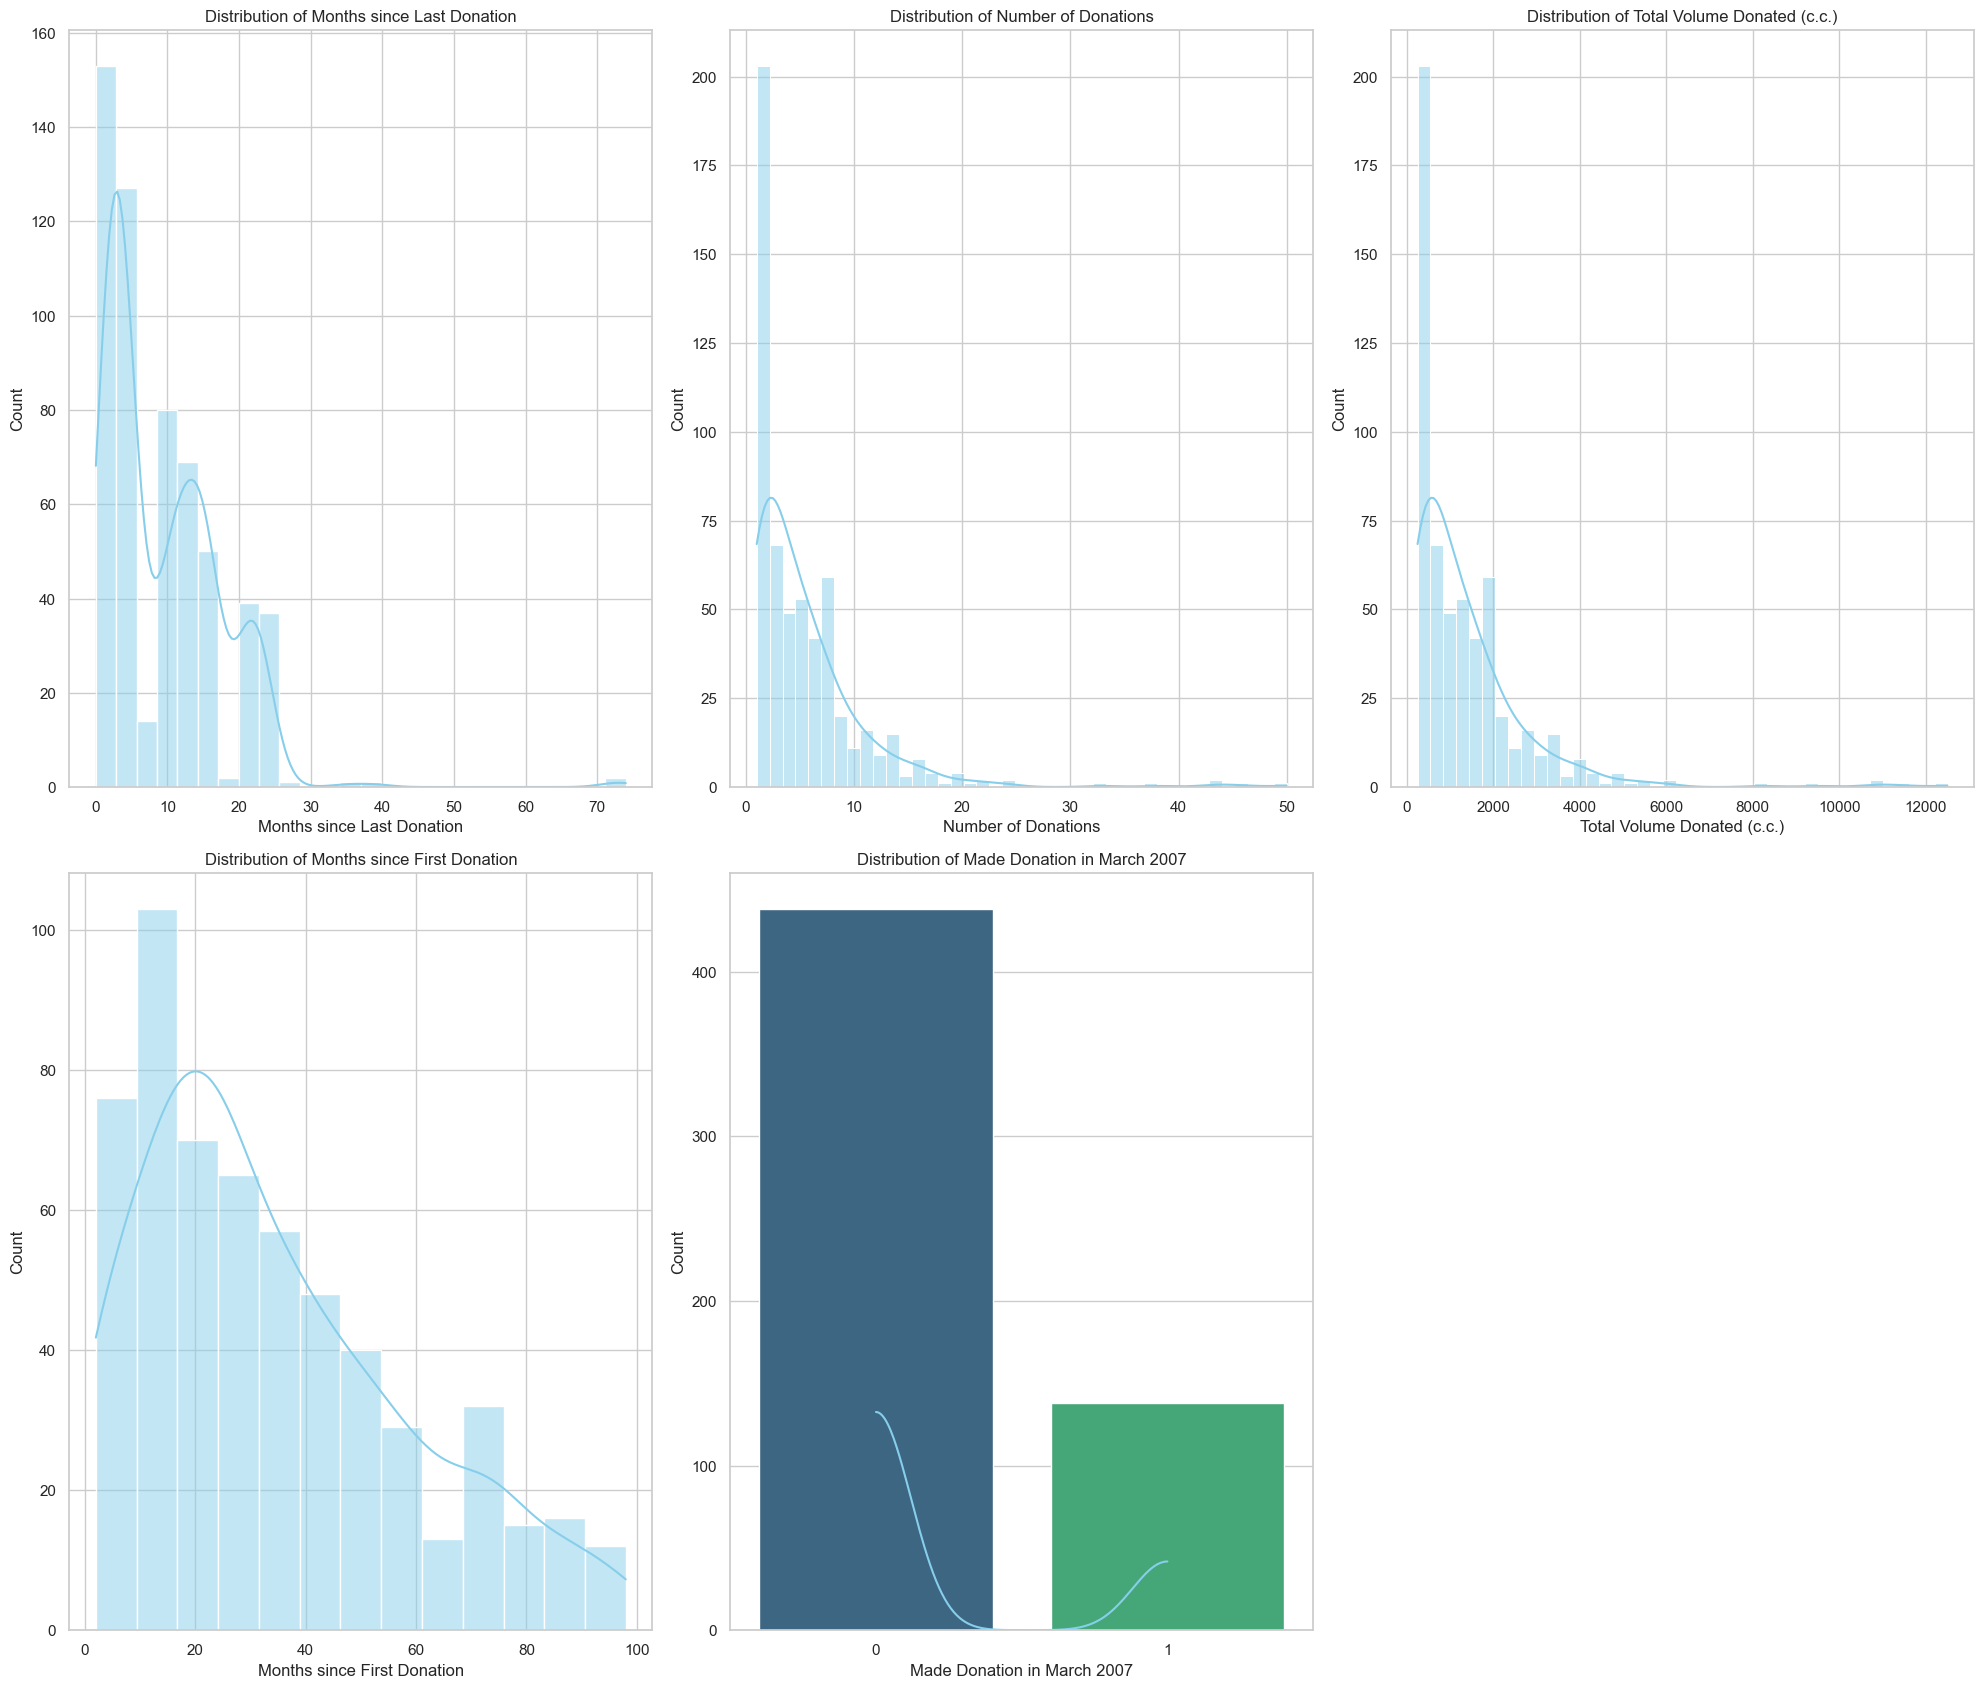

In [22]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25)) # plotting using matplotlib

num = 1

for i in df:
    plt.subplot(3,3,num) # plotting using matplotlib
    if num <= 16:
        sns.histplot(data=df[i], kde=True, color='skyblue')
        if df[i].nunique() <= 10:
            sns.countplot(data=df,x=i, palette='viridis') # plot the distribution of the target variable # count plot for class distribution
        plt.title(f'Distribution of {i}') # plotting using matplotlib
        plt.xlabel(i) # plotting using matplotlib
        plt.ylabel('Count') # plotting using matplotlib
    num += 1
    
plt.tight_layout() # plotting using matplotlib
plt.show() # plotting using matplotlib

## Bivariate Analysis

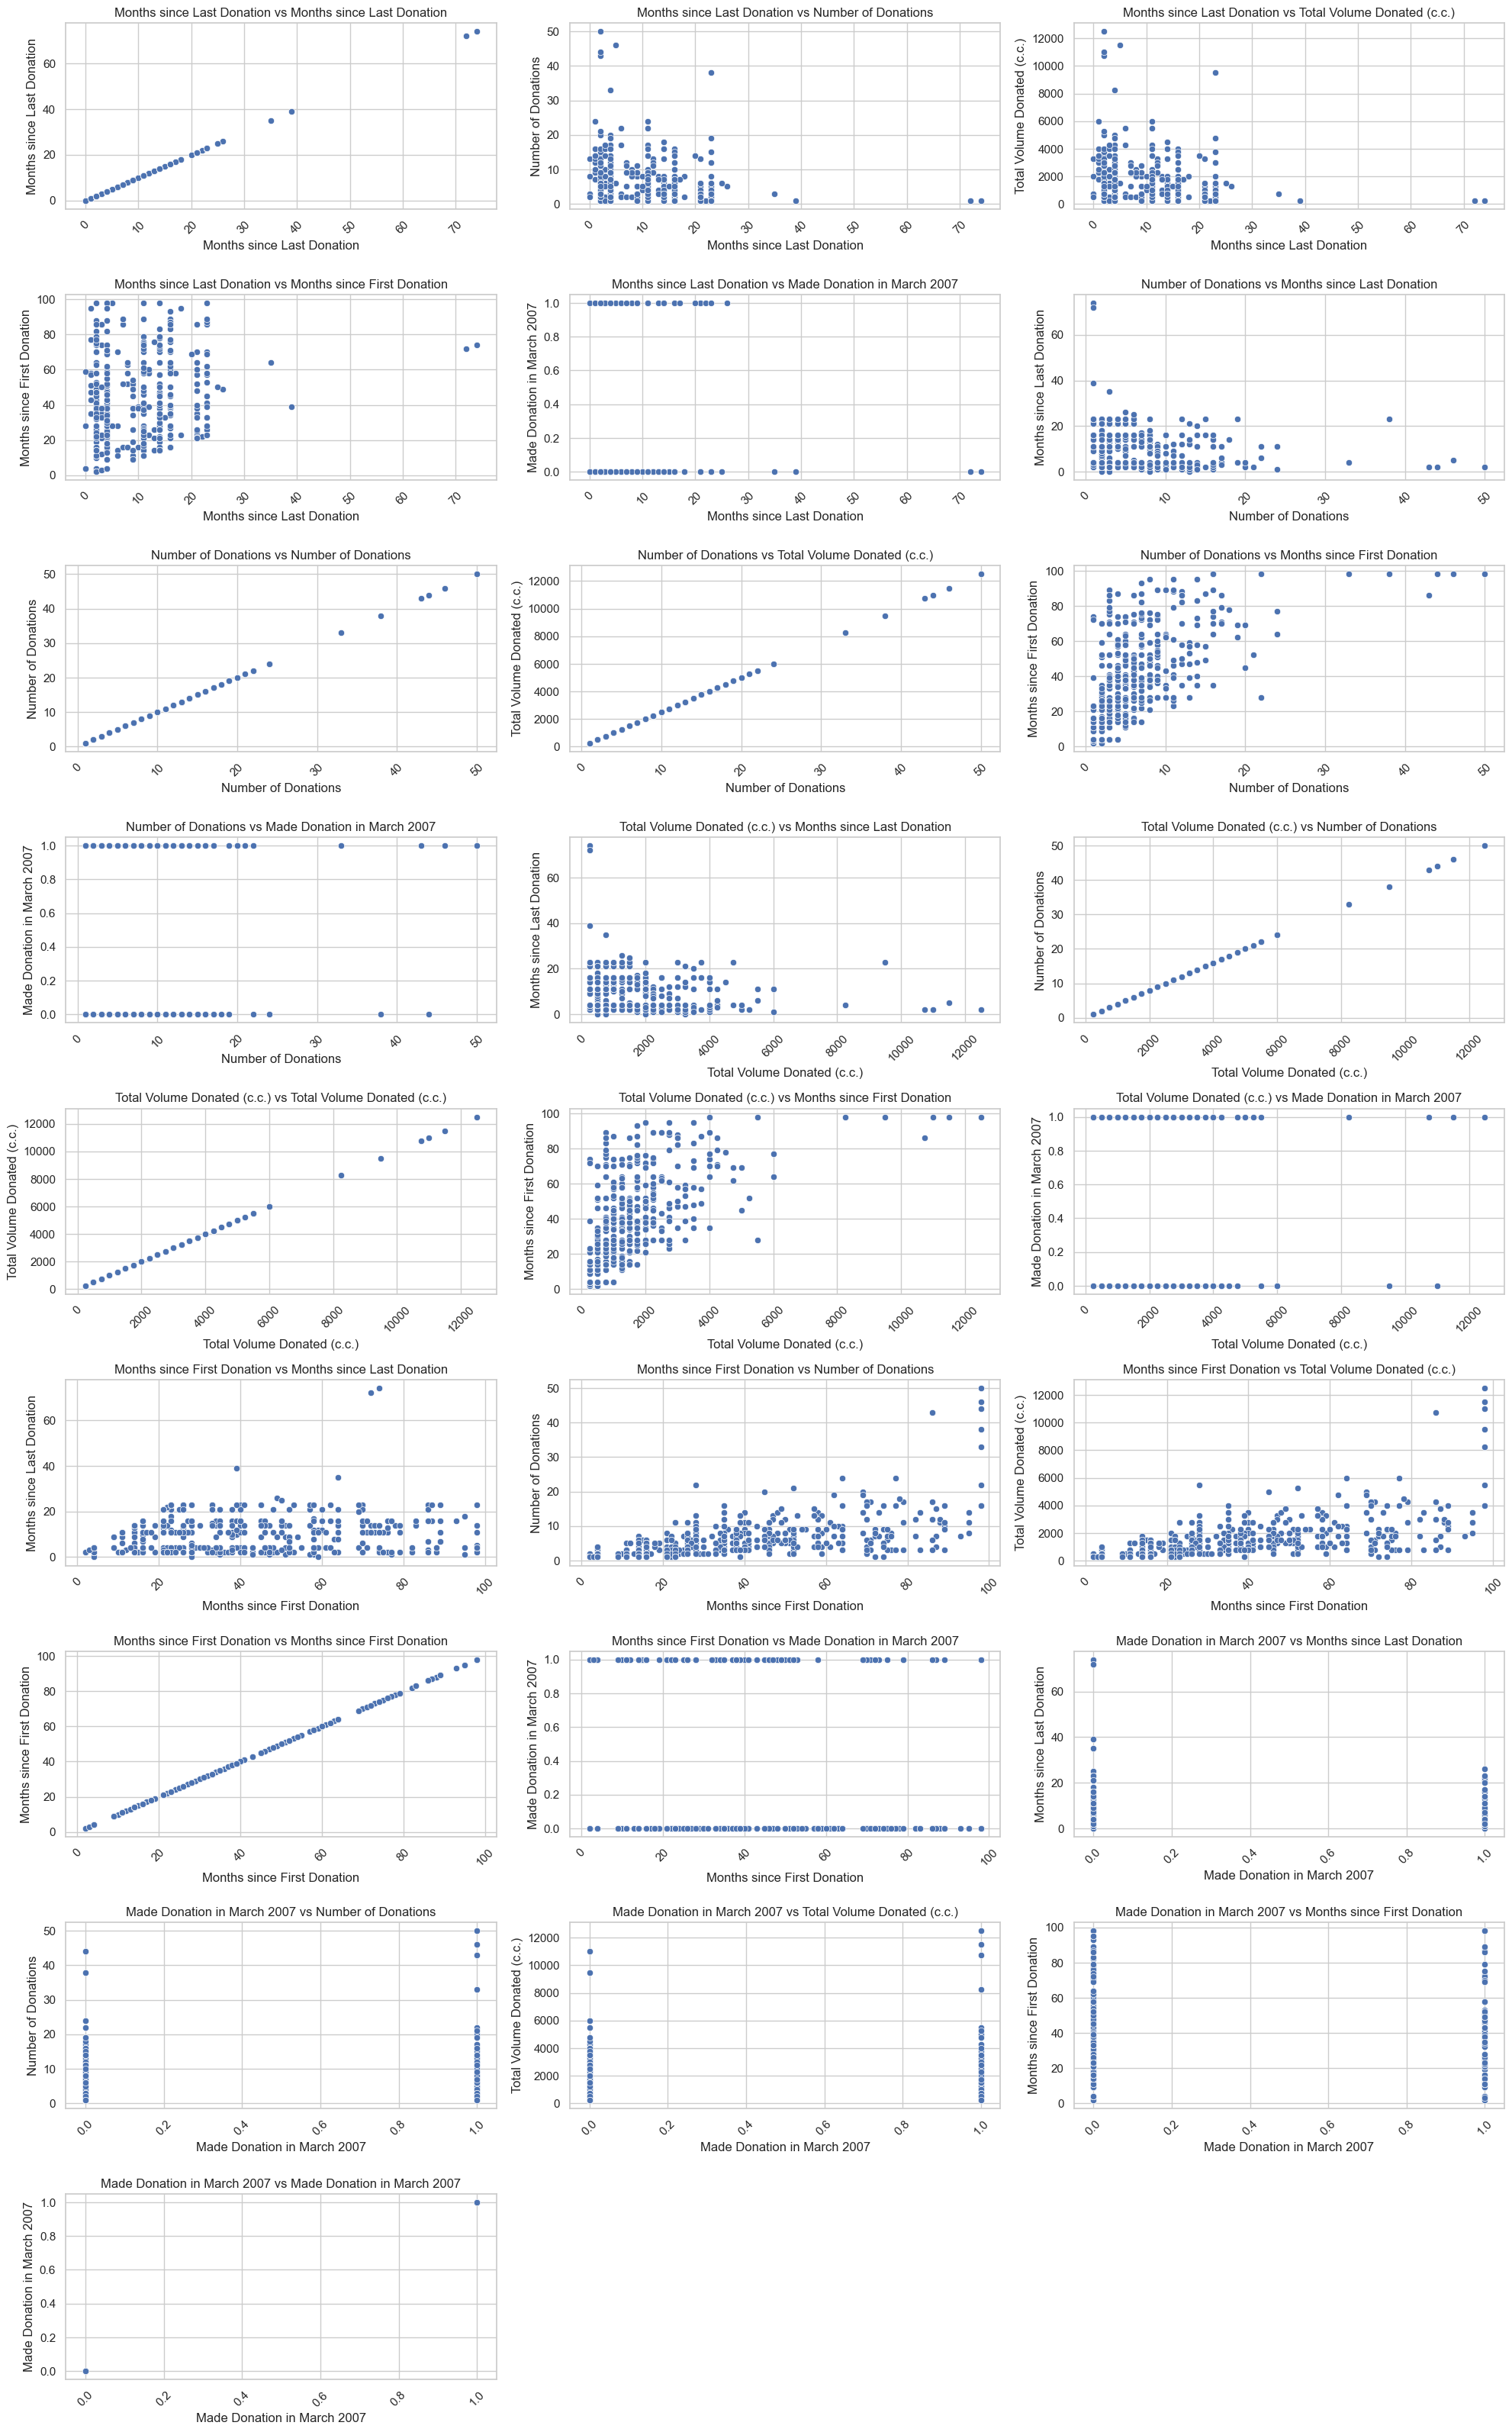

In [24]:
# doing Bivarient analysis , using "subplot" for 2 feature comparison 
plt.figure(figsize=(20,35),facecolor='white')
plot =1
for i in df:
    for j in df:
        if plot<=30:
            plt.subplot(10,3,plot)
            plt.title(f'{i} vs {j}')
            sns.scatterplot(x=i,y=j,data=df)
            plt.xticks(rotation=45)
            plot+=1
plt.tight_layout()

## multivarient analysis

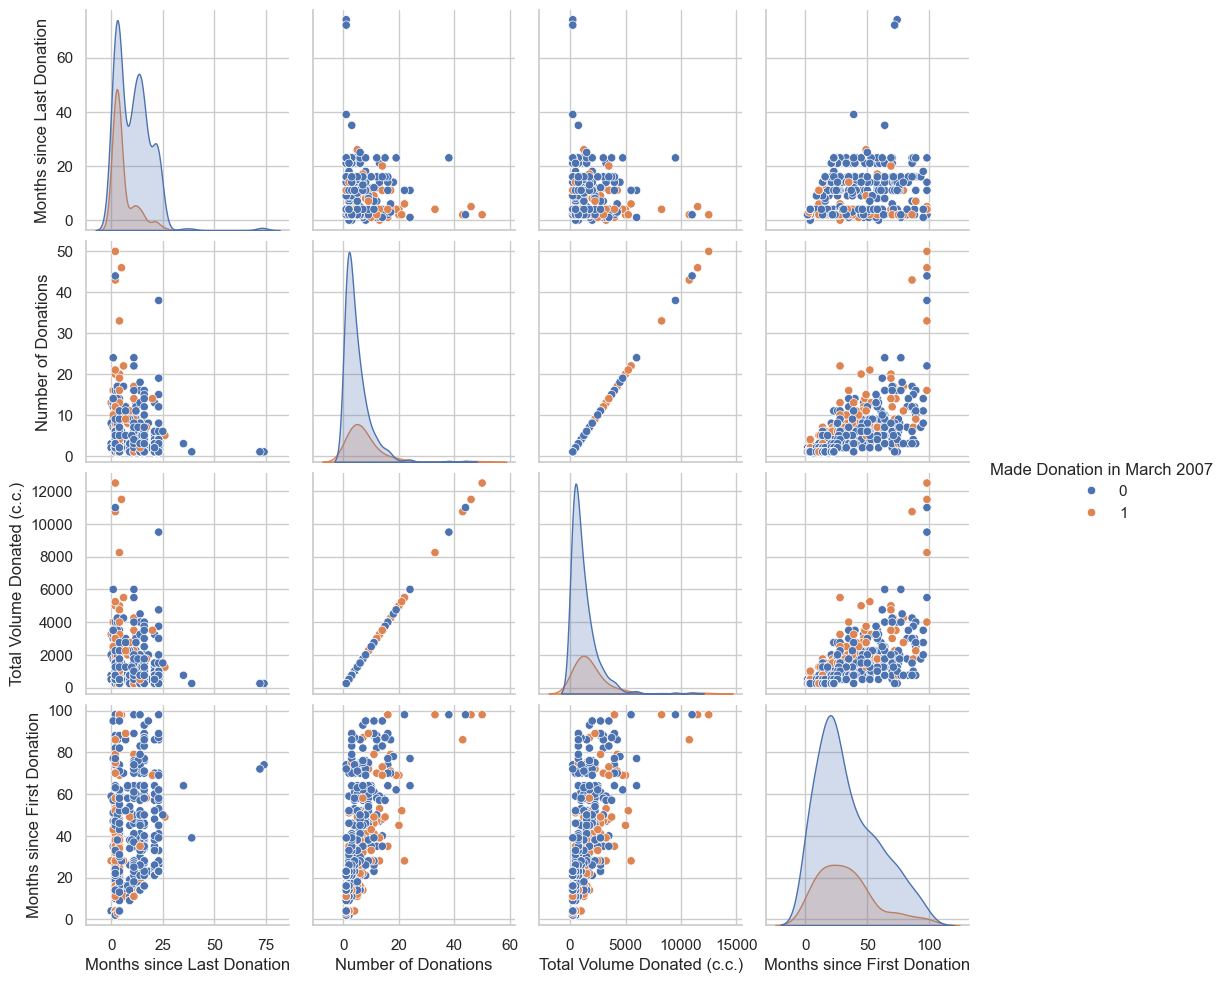

In [26]:
sns.pairplot(df,hue="Made Donation in March 2007")

## Applying HeatMap to check the correlation between features

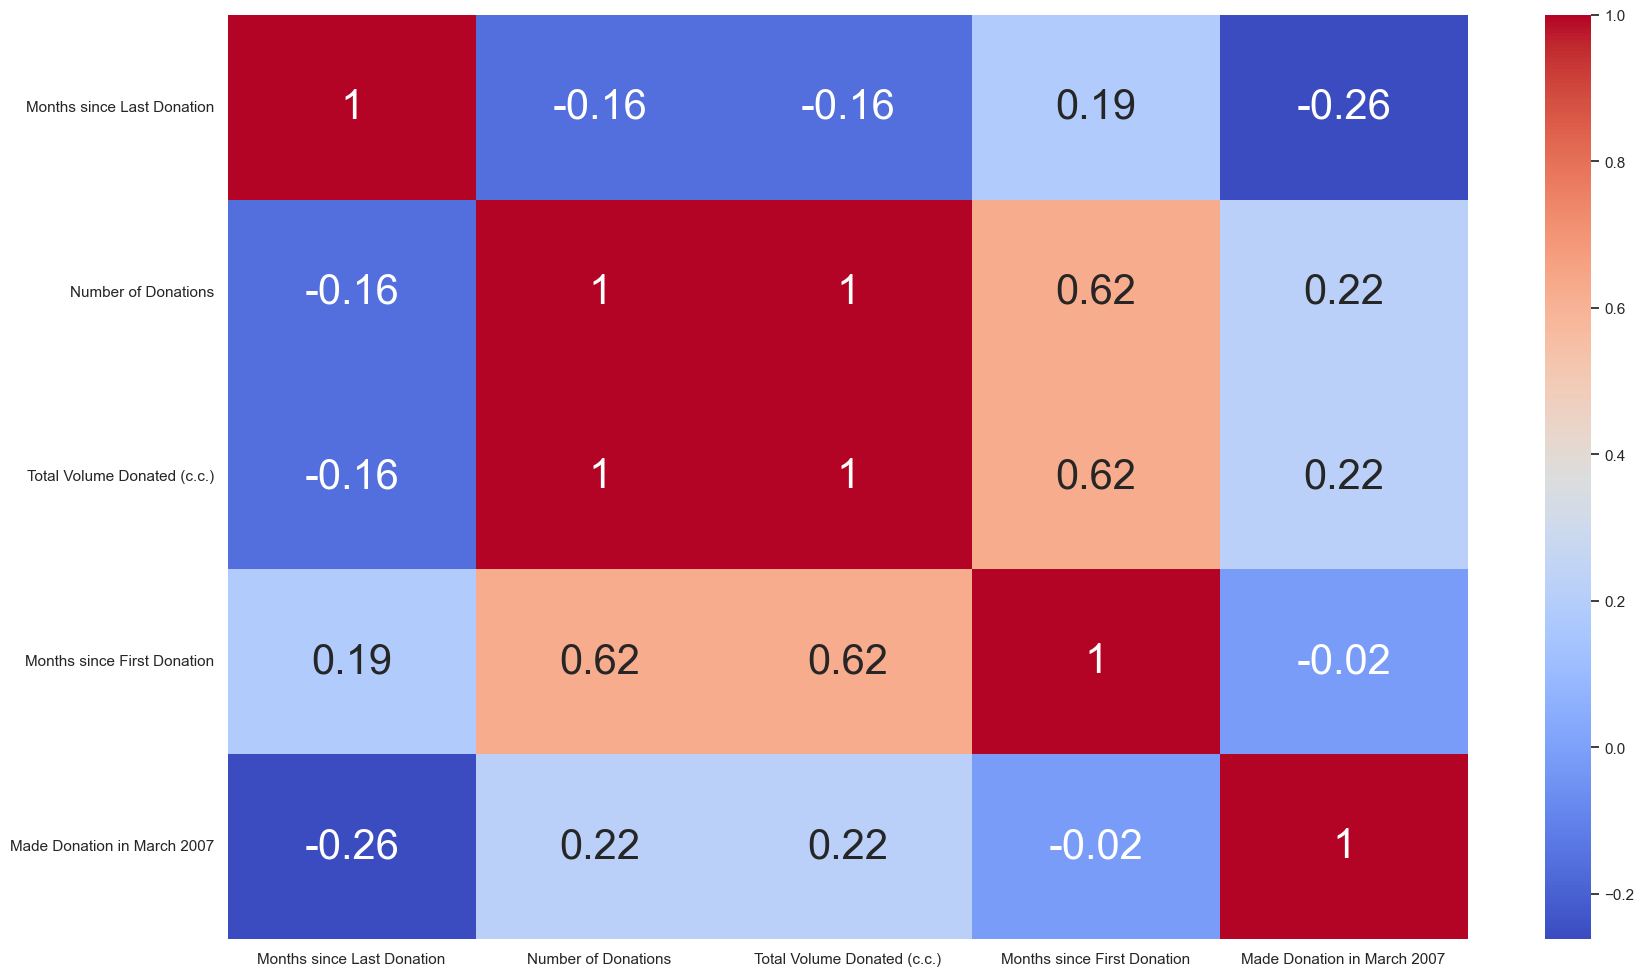

In [28]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':30},cmap='coolwarm')
plt.show() # displays the final heatmap.

### Here we can see that column name Number of Donations and Total Volume Donated (c.c.) have same correlation with output feature, so we drop any one on them

In [30]:
df.drop('Total Volume Donated (c.c.)',axis=1,inplace=True)

In [31]:
num_col=['Months since Last Donation','Number of Donations','Months since First Donation'] 

# Check for outliers in data`

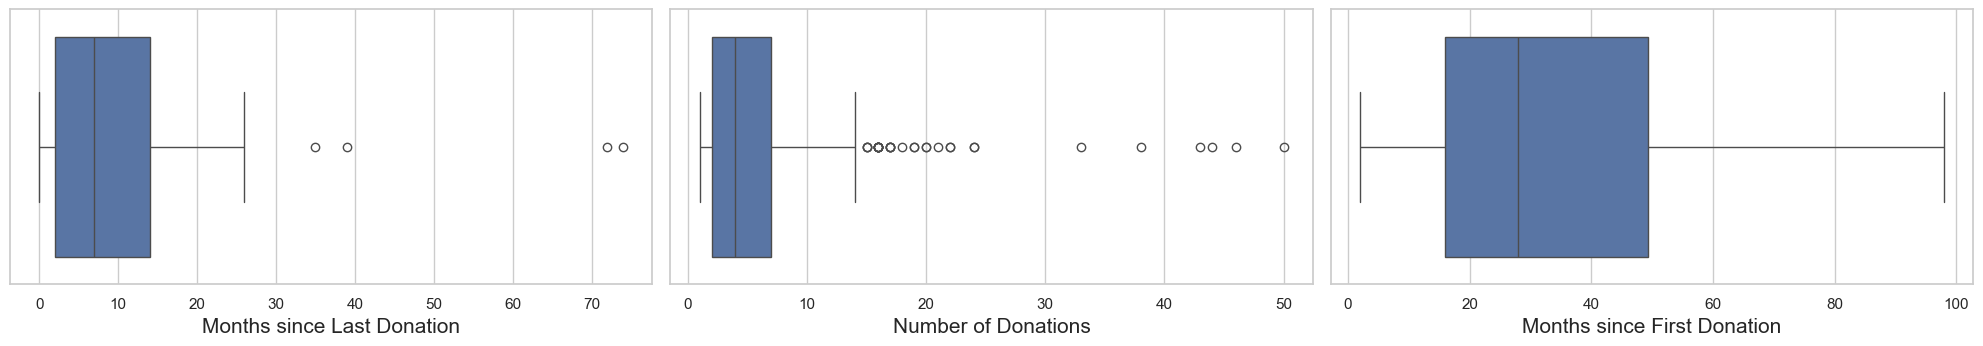

In [33]:
plt.figure(figsize=(20,10))
plot=1
for i in df[num_col]:
    if plot<=6:
        plt.subplot(3,3,plot)
        sns.boxplot(x=df[i],data=df)
        plt.xlabel(i,fontsize=15)
    plot+=1
plt.tight_layout()
plt.show()

In [34]:
# Remove Outliers for data
for i in df[num_col]:  # Loop through each numerical column in the DataFrame
    q1 = df[i].quantile(0.25)  # Calculate the 25th percentile (Q1)
    q3 = df[i].quantile(0.75)  # Calculate the 75th percentile (Q3)
    iqr = q3 - q1              # Compute the Interquartile Range (IQR)

    lower = q1 - 1.5 * iqr     # Define the lower bound for outliers
    upper = q3 + 1.5 * iqr     # Define the upper bound for outliers

    # Replace values that are below the lower bound or above the upper bound with the column's median
    df.loc[(df[i] < lower) | (df[i] > upper), i] = df[i].median()


## Checking Boxplot after Removing Outliers

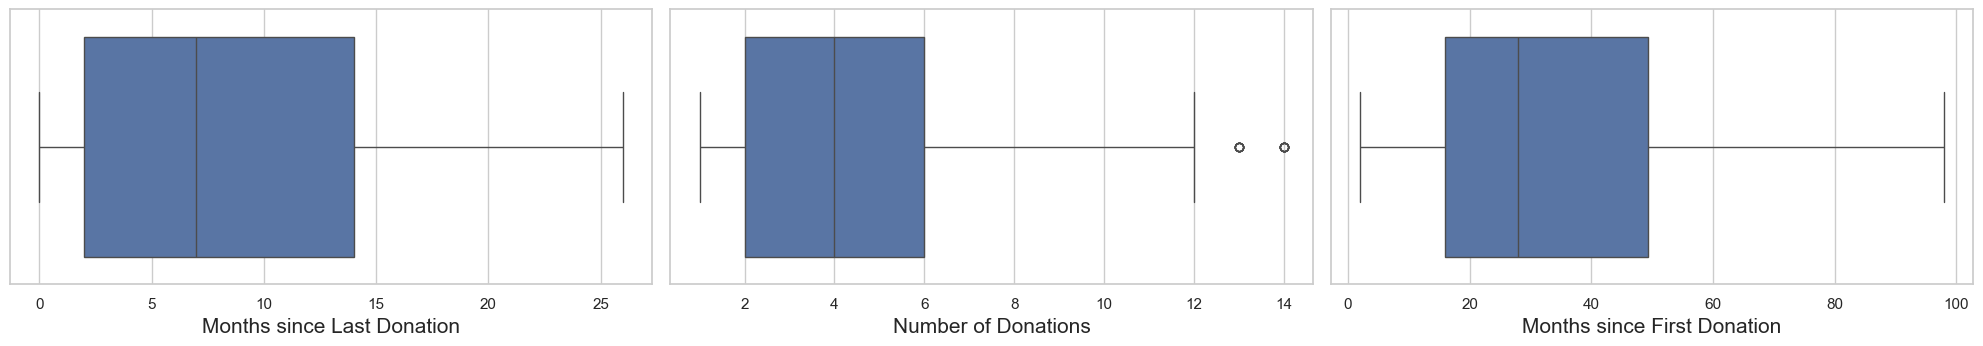

In [36]:
plt.figure(figsize=(20,10))
plot=1
for i in df[num_col]:
    if plot<=6:
        plt.subplot(3,3,plot)
        sns.boxplot(x=df[i],data=df)
        plt.xlabel(i,fontsize=15)
    plot+=1
plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Create an instance of StandardScaler to normalize numerical data

for i in df[num_col]:  
    # This loop is intended to scale each numerical column individually, but the implementation is incorrect.
    # Inside the loop, it keeps scaling the entire df[num_col] repeatedly, which is redundant and inefficient.

    df[num_col] = sc.fit_transform(df[num_col])  

## Spliting the Data into X and Y

In [39]:
# Separate the features (independent variables) and the target (dependent variable)
x = df.drop('Made Donation in March 2007', axis=1)  
y = df['Made Donation in March 2007']               

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y,                 # Input features and target
    test_size=0.2,        # 20% of the data will be used for testing, 80% for training
    random_state=33       # Ensures reproducibility of the split (same split every time the code runs)
)


In [40]:
!pip install imbalanced-learn

In [54]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()  # Create an instance of the SMOTE (Synthetic Minority Over-sampling Technique) class

# Apply SMOTE to the training data to balance the class distribution
sm_x_train, sm_y_train = sm.fit_resample(x_train, y_train)


In [55]:
from collections import Counter  # Import Counter to count the number of instances in each class

# Print class distribution before applying SMOTE
print("Before Apply SMOTE->>>> ", Counter(y_train))  
# This shows how many samples belong to each class in the original training set

# Print class distribution after applying SMOTE
print("After Apply SMOTE->>>> ", Counter(sm_y_train))  

Before Apply SMOTE->>>>  Counter({0: 345, 1: 115})
After Apply SMOTE->>>>  Counter({0: 345, 1: 345})


# Create A Multipal Model One After One

# 1. Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression  # Import the Logistic Regression model from scikit-learn

lg = LogisticRegression()  # Create an instance of the Logistic Regression classifier

lg.fit(sm_x_train, sm_y_train)  # Train (fit) the model using the balanced training data from SMOTE


LogisticRegression()

In [59]:
from sklearn.metrics import classification_report # Import a function to generate a detailed classification performance summary

## Testing Accuracy of Logistic Classification 

In [61]:
y_lg_pre=lg.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,y_lg_pre))

Testing Accuracy               precision    recall  f1-score   support

           0       0.94      0.55      0.69        93
           1       0.32      0.87      0.47        23

    accuracy                           0.61       116
   macro avg       0.63      0.71      0.58       116
weighted avg       0.82      0.61      0.65       116



## Training Accuracy of Logistic Classification

In [63]:
y_lg_predict=lg.predict(x_train)
print(f'Testing Accuracy',classification_report(y_train,y_lg_predict))

Testing Accuracy               precision    recall  f1-score   support

           0       0.86      0.56      0.68       345
           1       0.36      0.74      0.48       115

    accuracy                           0.60       460
   macro avg       0.61      0.65      0.58       460
weighted avg       0.74      0.60      0.63       460



# 2. SVM :- Support Vector MAchine

In [66]:
from sklearn.svm import SVC  # Import the Support Vector Classifier (SVC) from scikit-learn

svc = SVC()  # Create an instance of the SVC model with default hyperparameters

svc.fit(sm_x_train, sm_y_train)  # Train (fit) the SVC model using the balanced training data from SMOTE

SVC()

## Testing Accuracy Of SVC

In [68]:
svc_y_pre=svc.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,svc_y_pre))

Testing Accuracy               precision    recall  f1-score   support

           0       0.89      0.71      0.79        93
           1       0.36      0.65      0.46        23

    accuracy                           0.70       116
   macro avg       0.62      0.68      0.63       116
weighted avg       0.79      0.70      0.73       116



## Training Accuracy of SVC

In [70]:
svc_y_predict=svc.predict(x_train)
print(f'Testing Accuracy',classification_report(y_train,svc_y_predict))

Testing Accuracy               precision    recall  f1-score   support

           0       0.87      0.77      0.82       345
           1       0.49      0.64      0.55       115

    accuracy                           0.74       460
   macro avg       0.68      0.71      0.69       460
weighted avg       0.77      0.74      0.75       460



## Hyper Parameters of SVC

In [72]:
hyper_parameters = {
    'C': [0.1, 0.01, 1, 10, 100],  
    # Regularization parameter.
    # Lower values of C make the margin wider but allow more misclassifications (high bias, low variance).
    # Higher values aim to classify all training examples correctly (low bias, high variance).

    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    # Specifies the kernel type to be used in the algorithm:
    # - 'linear': good for linearly separable data
    # - 'poly': polynomial kernel (useful for capturing interactions)
    # - 'rbf': radial basis function, good default choice
    # - 'sigmoid': behaves like a neural network activation function

    'gamma': ['scale', 'auto']  
    # Kernel coefficient for 'rbf', 'poly', and 'sigmoid':
    # - 'scale': uses 1 / (n_features * X.var()) — recommended default
    # - 'auto': uses 1 / n_features — may underperform in some cases
}

In [82]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for exhaustive hyperparameter tuning

# Set up GridSearchCV to find the best combination of hyperparameters for the SVC model
svc_cv = GridSearchCV(
    svc,                   # The base SVC model
    hyper_parameters,      # The hyperparameter grid to search over
    refit=True,            # Once the best parameters are found, refit the model on the entire training set
    n_jobs=1,              # Number of CPU cores to use (1 means no parallel processing)
    verbose=3,             # Controls the level of detail in logging (3 = detailed messages)
    cv=3,                  # Use 3-fold cross-validation for evaluating each parameter combination
    scoring='f1'           # Optimize for F1-score (useful when dealing with imbalanced classes)
)

svc_cv.fit(sm_x_train, sm_y_train)  # Fit the model with the training data using the specified grid search

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.701 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.680 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.661 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.675 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.708 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.682 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.646 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.634 total time=   0.0s
[CV 1/3] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.709 total time=   0.0s
[CV 2/3] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 3/3] END C=0.1, gamma=scale, kernel=sigmoid

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 0.01, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=3)

In [83]:
svc_cv.best_params_ # Printing Best parameters

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [97]:
svc1=SVC(C=100,gamma='scale',kernel='rbf')
svc1.fit(sm_x_train,sm_y_train)

SVC(C=100)

## Testing Accuracy of SVC After Hyper Parameters`

In [100]:
y_svc1_pre=svc1.predict(x_test)
print(f'Training Accuracy',classification_report(y_test,y_svc1_pre))

Training Accuracy               precision    recall  f1-score   support

           0       0.86      0.61      0.72        93
           1       0.28      0.61      0.38        23

    accuracy                           0.61       116
   macro avg       0.57      0.61      0.55       116
weighted avg       0.75      0.61      0.65       116



## Training Accuracy of SVC After Hyper Parameters 

In [103]:
y_svc1_predict=svc1.predict(x_train)
print(f'Training Accuracy',classification_report(y_train,y_svc1_predict))

Training Accuracy               precision    recall  f1-score   support

           0       0.91      0.74      0.81       345
           1       0.50      0.78      0.61       115

    accuracy                           0.75       460
   macro avg       0.70      0.76      0.71       460
weighted avg       0.81      0.75      0.76       460



## 3.Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree Classifier from scikit-learn

dt = DecisionTreeClassifier(class_weight='balanced')  
# Create an instance of the Decision Tree Classifier
# 'class_weight="balanced"' automatically adjusts weights inversely proportional to class frequencies,
# which helps handle class imbalance (even though SMOTE is already applied, this adds extra robustness)

dt.fit(sm_x_train, sm_y_train) 

DecisionTreeClassifier(class_weight='balanced')

## TESTING ACCURACY OF DECISION TREE

In [109]:
y_dt_pre=dt.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,y_dt_pre))

Testing Accuracy               precision    recall  f1-score   support

           0       0.80      0.74      0.77        93
           1       0.20      0.26      0.23        23

    accuracy                           0.65       116
   macro avg       0.50      0.50      0.50       116
weighted avg       0.68      0.65      0.66       116



## Training Accuracy DECISION TREE

In [112]:
y_dt_predict=dt.predict(x_train)
print(f'Training Accuracy',classification_report(y_train,y_dt_predict))

Training Accuracy               precision    recall  f1-score   support

           0       0.95      0.98      0.97       345
           1       0.94      0.85      0.89       115

    accuracy                           0.95       460
   macro avg       0.95      0.92      0.93       460
weighted avg       0.95      0.95      0.95       460



## Hyper Parameter of Decision Tree

In [115]:
dt_hyper = {
    'criterion': ('gini', 'entropy'),  
    # The function to measure the quality of a split:
    # - 'gini': Gini impurity (default)
    # - 'entropy': Information gain (based on entropy)

    'splitter': ('best', 'random'),  
    # The strategy used to split at each node:
    # - 'best': chooses the best split
    # - 'random': chooses the best random split (can help avoid overfitting)

    'max_depth': list(range(1, 10)),  
    # Maximum depth of the tree.
    # Smaller depths prevent overfitting but may underfit; 

    'min_samples_split': [2, 3, 4, 5, 10],  
    # The minimum number of samples required to split an internal node.
    # Higher values reduce tree growth and may generalize better.

    'min_samples_leaf': list(range(2, 20))  
    # The minimum number of samples required to be at a leaf node.
    # Helps prevent overfitting by requiring more data at each leaf.
}


In [117]:
from sklearn.model_selection import GridSearchCV

In [119]:
dt_cv=GridSearchCV(dt,dt_hyper,refit=True,scoring='f1',verbose=3,cv=3,n_jobs=1)
# Fitting the model using the SMOTE-balanced training data
dt_cv.fit(sm_x_train,sm_y_train)

Fitting 3 folds for each of 3240 candidates, totalling 9720 fits
[CV 1/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.531 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.661 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.669 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.629 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.691 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.685 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.531 total time=   0.0s
[CV 2/3] END criter

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=3)

In [120]:
dt_cv.best_params_ # printing the best parameters

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [125]:
dt1=DecisionTreeClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=2,criterion='entropy',random_state=25,splitter='random')

In [127]:
dt1.fit(sm_x_train,sm_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       random_state=25, splitter='random')

## checking it's accuracy using IT'S BEST PARAMETERS OF TRAINING ACCURACY

## Testing Accuracy of Decision Tree using its best Parameters

In [131]:
y_dt1_hp_pre=dt1.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,y_dt1_hp_pre))

Testing Accuracy               precision    recall  f1-score   support

           0       0.88      0.72      0.79        93
           1       0.35      0.61      0.44        23

    accuracy                           0.70       116
   macro avg       0.62      0.66      0.62       116
weighted avg       0.78      0.70      0.72       116



## Training Accuracy of Decision Tree using its best Parameters

In [134]:
y_dt1_hp_predict=dt1.predict(x_train)
print(f'Testing Accuracy',classification_report(y_train,y_dt1_hp_predict))

Testing Accuracy               precision    recall  f1-score   support

           0       0.88      0.80      0.84       345
           1       0.54      0.69      0.60       115

    accuracy                           0.77       460
   macro avg       0.71      0.74      0.72       460
weighted avg       0.80      0.77      0.78       460



## 4. Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest classifier from scikit-learn

rf = RandomForestClassifier()  
# Create an instance of the Random Forest classifier using default hyperparameters
# Random Forest is an ensemble method that builds multiple decision trees and merges them to improve accuracy and reduce overfitting

rf.fit(sm_x_train, sm_y_train) 

RandomForestClassifier()

## Testing Accuracy of Random Forest

In [140]:
y_rf_pre=rf.predict(x_test)
print(classification_report(y_test,y_rf_pre))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        93
           1       0.33      0.30      0.32        23

    accuracy                           0.74       116
   macro avg       0.58      0.58      0.58       116
weighted avg       0.73      0.74      0.74       116



## Training Accuracy of Random Forest

In [143]:
y_rf_predict=rf.predict(x_train)
print(classification_report(y_train,y_rf_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       345
           1       0.93      0.87      0.90       115

    accuracy                           0.95       460
   macro avg       0.94      0.92      0.93       460
weighted avg       0.95      0.95      0.95       460



## Hyper parameters of Random Forest

In [146]:
rf_hyper = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=5)],
    # Number of trees in the forest.
    # A higher number generally improves performance but increases training time.
    # This line generates 5 values evenly spaced between 200 and 2000.

    'max_features': ['auto', 'sqrt', 'log2'],
    # Number of features to consider when looking for the best split:
    # - 'auto': uses all features (deprecated, behaves like 'sqrt' in recent versions)
    # - 'sqrt': square root of the total number of features (default for classifiers)
    # - 'log2': log base 2 of the total number of features

    'max_depth': [int(x) for x in np.linspace(10, 110, num=5)],
    # Maximum depth of each tree.
    # Controls how deep the trees can grow; deeper trees can capture more complexity but may overfit.

    'min_samples_split': [5, 10],
    # Minimum number of samples required to split an internal node.
    # Higher values help prevent overfitting by limiting tree growth.

    'min_samples_leaf': [2, 4]
    # Minimum number of samples required to be at a leaf node.
    # Useful to smooth out the model and prevent it from learning noise in the data.
}

In [148]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest Classifier

rf1 = RandomForestClassifier(random_state=5)  
# Initialize a Random Forest model with a fixed random state for reproducibility

rf1_cv = GridSearchCV(
    estimator=rf1,           # The model to tune
    param_grid=rf_hyper,     # The dictionary of hyperparameters to search over
    verbose=3,               # Controls the amount of logging (3 = detailed output of each step)
    cv=3,                    # 3-fold cross-validation to evaluate each parameter combination
    refit=True,              # After finding the best parameters, refit the model on the full training set
    n_jobs=1,                # Use 1 core for computation (set to -1 for using all cores)
    scoring='f1'             # Use F1-score as the metric for evaluating model performance
)

rf1_cv.fit(sm_x_train, sm_y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=nan total time

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=5), n_jobs=1,
             param_grid={'max_depth': [10, 35, 60, 85, 110],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 650, 1100, 1550, 2000]},
             scoring='f1', verbose=3)

In [149]:
rf1_cv.best_params_ # printing the best parameters

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 650}

In [152]:
rf1=RandomForestClassifier(max_depth=35,min_samples_leaf=2,min_samples_split=5,random_state=25,n_estimators=650,max_features='sqrt')

In [154]:
rf1.fit(sm_x_train,sm_y_train)

RandomForestClassifier(max_depth=35, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=650, random_state=25)

## checking it's accuracy using IT'S BEST PARAMETERS OF TRAINING ACCURACY

## Testing Accuracy 

In [158]:
y_rf1_pre=rf1.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,y_rf1_pre))

Testing Accuracy               precision    recall  f1-score   support

           0       0.86      0.78      0.82        93
           1       0.35      0.48      0.41        23

    accuracy                           0.72       116
   macro avg       0.61      0.63      0.61       116
weighted avg       0.76      0.72      0.74       116



## Training Accuracy

In [161]:
y_rf1_predict=rf1.predict(x_train)
print(f'Testing Accuracy',classification_report(y_train,y_rf1_predict))

Testing Accuracy               precision    recall  f1-score   support

           0       0.92      0.91      0.92       345
           1       0.74      0.77      0.76       115

    accuracy                           0.88       460
   macro avg       0.83      0.84      0.84       460
weighted avg       0.88      0.88      0.88       460



## 5. Gradient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier  # Import the Gradient Boosting Classifier from scikit-learn

gb = GradientBoostingClassifier(random_state=22)  
# Create an instance of the Gradient Boosting model
# 'random_state=22' ensures reproducibility of results

gb.fit(sm_x_train, sm_y_train)  

GradientBoostingClassifier(random_state=22)

## Testing Accuracy

In [167]:
y_gb_pre=gb.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,y_gb_pre))

Testing Accuracy               precision    recall  f1-score   support

           0       0.85      0.76      0.80        93
           1       0.31      0.43      0.36        23

    accuracy                           0.70       116
   macro avg       0.58      0.60      0.58       116
weighted avg       0.74      0.70      0.72       116



## Training Accuracy

In [170]:
y_gb_predict=gb.predict(x_train)
print(f'Training Accuracy',classification_report(y_train,y_gb_predict))

Training Accuracy               precision    recall  f1-score   support

           0       0.90      0.87      0.88       345
           1       0.64      0.71      0.67       115

    accuracy                           0.83       460
   macro avg       0.77      0.79      0.78       460
weighted avg       0.84      0.83      0.83       460



In [172]:
gb_hyper = {
    "n_estimators": [50, 80, 100, 300],  
    # Number of boosting stages (i.e., trees) to build.
    # More estimators can improve performance but also increase training time and risk of overfitting.

    "max_depth": [4, 8, 15, 19],  
    # Maximum depth of each individual decision tree.
    # Deeper trees can capture more complex patterns but may overfit on smaller datasets.

    "learning_rate": [0.01, 0.03, 0.06, 0.1],  
    # Controls how much each tree contributes to the final prediction.
    # Smaller values require more trees but often lead to better generalization.

    "criterion": ['friedman_mse', 'squared_error'],  
    # The function used to measure the quality of a split:
    # - 'friedman_mse': default and usually better with boosting
    # - 'squared_error': equivalent to MSE, a more traditional approach

    "max_features": ['sqrt', 'log2'],  
    # Number of features to consider when looking for the best split:
    # - 'sqrt': square root of total features
    # - 'log2': log base 2 of total features

    "subsample": [0.8, 1.0]  
    # The fraction of samples to use for fitting each tree:
    # - <1.0 introduces randomness and can reduce overfitting
    # - 1.0 uses the full dataset (no randomness)
}

In [174]:
gb_cv=GridSearchCV(gb,gb_hyper,scoring='f1',verbose=3,cv=3,refit=True,n_jobs=1)
gb_cv.fit(sm_x_train,sm_y_train)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, max_depth=4, max_features=sqrt, n_estimators=50, subsample=0.8;, score=0.606 total time=   0.0s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, max_depth=4, max_features=sqrt, n_estimators=50, subsample=0.8;, score=0.711 total time=   0.0s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, max_depth=4, max_features=sqrt, n_estimators=50, subsample=0.8;, score=0.717 total time=   0.0s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, max_depth=4, max_features=sqrt, n_estimators=50, subsample=1.0;, score=0.602 total time=   0.0s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, max_depth=4, max_features=sqrt, n_estimators=50, subsample=1.0;, score=0.720 total time=   0.0s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, max_depth=4, max_features=sqrt, n_estimators=50, subsample=1.0;, score=0.714 total time=   0.0s
[CV 1/3] END crite

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=22),
             n_jobs=1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.03, 0.06, 0.1],
                         'max_depth': [4, 8, 15, 19],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 80, 100, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=3)

In [175]:
gb_cv.best_params_ ## Printing best parameters

{'criterion': 'squared_error',
 'learning_rate': 0.06,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'subsample': 0.8}

In [178]:
gb1=GradientBoostingClassifier(criterion = 'squared_error',
 learning_rate = 0.06,
 max_depth = 8,
 max_features = 'sqrt',
 n_estimators = 300,
 subsample = 0.8)
gb1.fit(sm_x_train,sm_y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.06,
                           max_depth=8, max_features='sqrt', n_estimators=300,
                           subsample=0.8)

## Testing Accuracy After using its best parameters

In [181]:
y_gb1_pre=gb1.predict(x_test)
print(classification_report(y_test,y_gb1_pre))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        93
           1       0.25      0.22      0.23        23

    accuracy                           0.72       116
   macro avg       0.53      0.53      0.53       116
weighted avg       0.70      0.72      0.71       116



## Training Accuracy After using its best parameters

In [184]:
y_gb1_predict=gb1.predict(x_train)
print(classification_report(y_train,y_gb1_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       345
           1       0.90      0.90      0.90       115

    accuracy                           0.95       460
   macro avg       0.93      0.93      0.93       460
weighted avg       0.95      0.95      0.95       460



In [186]:
 ! pip install xgboost

In [188]:
from xgboost import XGBRFClassifier  # Import the Random Forest variant of XGBoost

xgb = XGBRFClassifier()  
# Create an instance of the XGBRFClassifier using default hyperparameters
# XGBRFClassifier builds a **Random Forest** using XGBoost's framework (not boosting like XGBClassifier)

xgb.fit(x_train, y_train) 

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

## Testing Accuracy

In [191]:
y_xgb_per=xgb.predict(x_test)
print(f'Testing Accuracy',classification_report(y_test,y_xgb_per))

Testing Accuracy               precision    recall  f1-score   support

           0       0.86      0.85      0.85        93
           1       0.42      0.43      0.43        23

    accuracy                           0.77       116
   macro avg       0.64      0.64      0.64       116
weighted avg       0.77      0.77      0.77       116



## Tarining Accuracy

In [194]:
y_xgb_predict=xgb.predict(x_train)
print(f'Testing Accuracy',classification_report(y_train,y_xgb_predict))

Testing Accuracy               precision    recall  f1-score   support

           0       0.87      0.89      0.88       345
           1       0.64      0.61      0.62       115

    accuracy                           0.82       460
   macro avg       0.76      0.75      0.75       460
weighted avg       0.81      0.82      0.82       460



In [196]:
xgb_params = {
    'gamma': [0, 0.2, 1, 4],
    # Minimum loss reduction required to make a further partition on a leaf node.
    # Higher values make the algorithm more conservative.

    'learning_rate': [0.01, 0.03, 0.06, 0.1],
    # Step size shrinkage used to prevent overfitting.
    # Smaller values usually improve performance but require more trees.

    'max_depth': [5, 6, 7, 8, 9],
    # Maximum depth of a tree. Deeper trees capture more complexity but may overfit.

    'n_estimators': [50, 65, 80],
    # Number of boosting rounds (i.e., number of trees to build).

    'reg_alpha': [0, 0.1, 0.2, 0.4],
    # L1 regularization term on weights. Useful for feature selection.

    'reg_lambda': [0, 0.1, 0.2, 0.4]
    # L2 regularization term on weights. Helps reduce model complexity and overfitting.
}


In [198]:
xgb_cv=GridSearchCV(xgb,xgb_params,scoring='f1',verbose=3,cv=3,refit=True,n_jobs=1)
xgb_cv.fit(sm_x_train,sm_y_train)

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0;, score=0.488 total time=   0.0s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0;, score=0.736 total time=   0.0s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0;, score=0.712 total time=   0.0s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.529 total time=   0.0s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.742 total time=   0.0s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.715 total time=   0.0s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.2;, score=0.494 total time=   0.0s
[CV 2/3] 

GridSearchCV(cv=3,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       feature_weights=None, gamma=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_c...
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0, 0.2, 1, 4],
                         'learning_rate': [0.01, 0.03, 0.06, 0.1],
                         'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [50, 65, 80],
                         'reg_alpha': [0, 0.1, 0.2, 0.4],
                         'reg_lambda': [0, 0.1, 0.2, 0.4]},
             scoring='f1', verbose=3)

In [200]:
xgb_cv.best_params_ ## Printing Its best Parameters

{'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 50,
 'reg_alpha': 0.2,
 'reg_lambda': 0.4}

In [202]:
xgb1=XGBRFClassifier(gamma= 1,
 learning = 0.01,
 max_depth = 9,
 n_estimators= 50,
 reg_alpha= 0.2,
 reg_lambda= 0.4)

In [204]:
xgb1.fit(sm_x_train,sm_y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=1, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=9, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=50, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic', ...)

## Testing Accuracy After using its best parameters

In [207]:
y_xgb1_per = xgb1.predict(x_test)  
print(f'Testing Accuracy', classification_report(y_test, y_xgb1_per))  

Testing Accuracy               precision    recall  f1-score   support

           0       0.87      0.72      0.79        93
           1       0.33      0.57      0.42        23

    accuracy                           0.69       116
   macro avg       0.60      0.64      0.60       116
weighted avg       0.76      0.69      0.72       116



## Tarining Accuracy After using its best parameters

In [210]:
y_xgb1_predict = xgb1.predict(x_train)  
print(f'Testing Accuracy', classification_report(y_train, y_xgb1_predict))  

Testing Accuracy               precision    recall  f1-score   support

           0       0.92      0.84      0.88       345
           1       0.62      0.77      0.69       115

    accuracy                           0.82       460
   macro avg       0.77      0.81      0.78       460
weighted avg       0.84      0.82      0.83       460



##  Final Model Performance Conclusion

We trained and tested several machine learning models to classify the data and compared their performance before and after hyperparameter tuning.

###  Before Hyperparameter Tuning:
- **Logistic Regression** showed low accuracy (**61% test**, **60% train**), indicating it was not suitable for this problem.
- **SVM** performed moderately well (**70% test**, **74% train**) with balanced results.
- **Decision Tree** showed high training accuracy (**95%**) but lower testing accuracy (**65%**), suggesting **overfitting**.
- **Random Forest** performed better with **74% test accuracy, with **95% train accuracy**, showing strong capability.
- **Gradient Boosting** showed high training accuracy (**83%**) but lower testing accuracy (**70%**), 
- **XGBClassifier** had the **best test accuracy** of **77%**, with a good training score.

###  After Hyperparameter Tuning:
- **SVM** accuracy dropped to **61%**, suggesting tuning was not effective here.
- **Decision Tree** improved in generalization but still had some overfitting (**70% test / 77% train**).
- **Random Forest** showed improved balance (**72% test / 88% train**), making it more reliable.
- **Gradient Boosting** slightly dropped in testing accuracy (**72%**),training accuracy (**95%**) but remained powerful.
- **XGBClassifier** stayed strong with **69% test accuracy** and good training performance (**82%**).

###  Final Conclusion:
- **Random Forest** and **XGBClassifier** also performed consistently well, especially after hyperparameter tuning.
- **Random Forest** is a great choice for its simplicity, stability, and performance.

 - **Recommended Final Model** : *Random Forest*
